In [66]:
import pandas as pd
import numpy  as np
import operator

import matplotlib.pyplot as plt
import itertools    
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from foot_challenge.src.main import prepare_attribut_data, prepare_result_data
from foot_challenge.src.main import convert_to_one_hot
from foot_challenge.src.main import DRAW, HOME_WINS, AWAY_WINS

from sklearn.decomposition import PCA

In [43]:
train_path_away = '../data/Train_Data/train_away_team_statistics_df.csv'
train_path_home = '../data/Train_Data/train_home_team_statistics_df.csv'
train_path_result = '../data/Train_Data/Y_train.csv'
df_attribut = prepare_attribut_data(train_path_away, train_path_home)
df_result = prepare_result_data(train_path_result)

In [44]:
df_attribut.head()

,ID,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
0,0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,0.0,2.0
4,4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0


In [45]:
df_result.head()

,result
0,-2
1,-1
2,-2
3,1
4,-1


In [46]:
from sklearn.model_selection import train_test_split

attribut_train, attribut_test, result_train, result_test = train_test_split(df_attribut.drop(['ID'], axis=1), df_result, test_size=0.1,
                                                                            random_state=10)


In [47]:
df_result.head()

,result
0,-2
1,-1
2,-2
3,1
4,-1


In [48]:
n_components = 5

pca = PCA(n_components=n_components)
pca.fit(attribut_train)

attribut_train_reduced = pd.DataFrame(pca.transform(attribut_train), index=attribut_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
attribut_test_reduced = pd.DataFrame(pca.transform(attribut_test), index=attribut_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

C:\Users\pc\AppData\Local\Temp\ipykernel_20948\2422254758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')


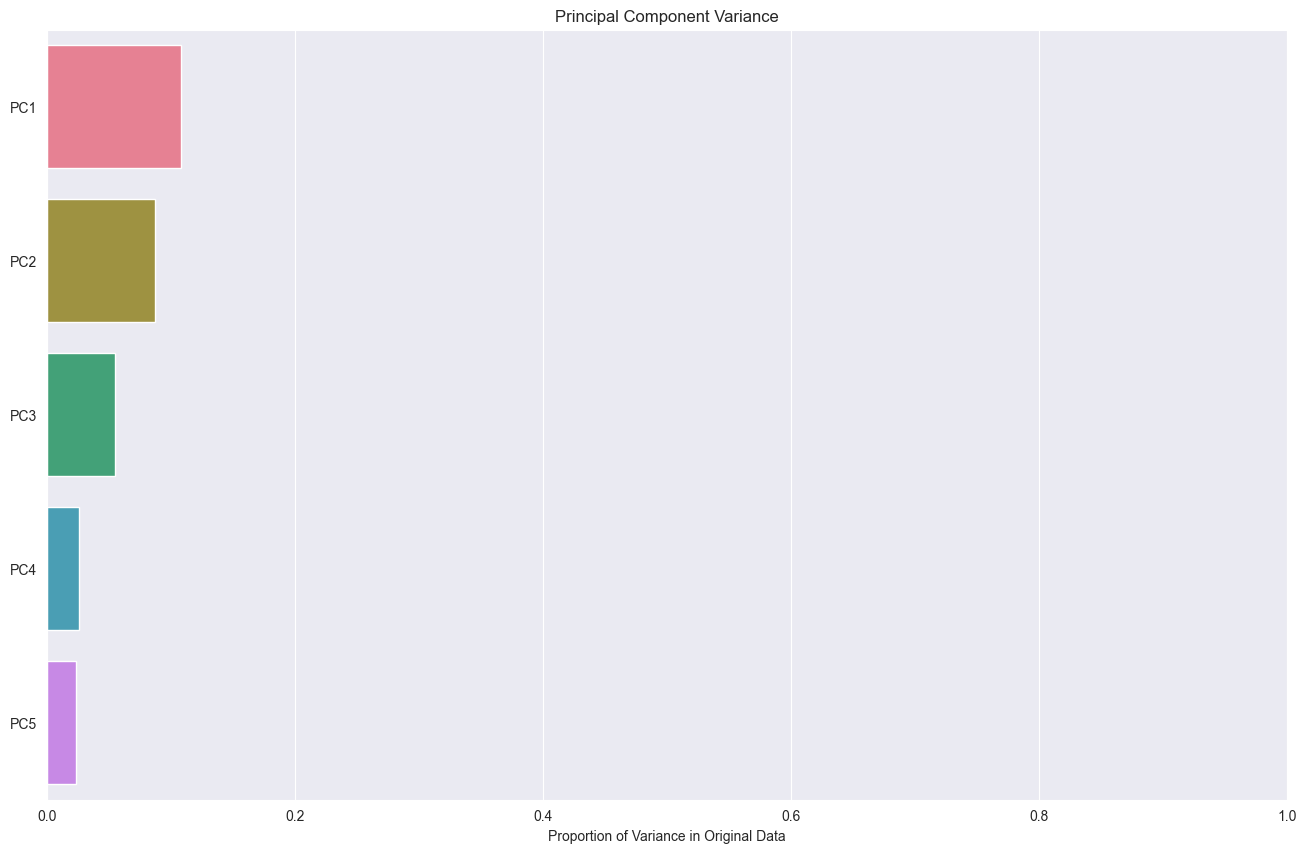

In [49]:

plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()


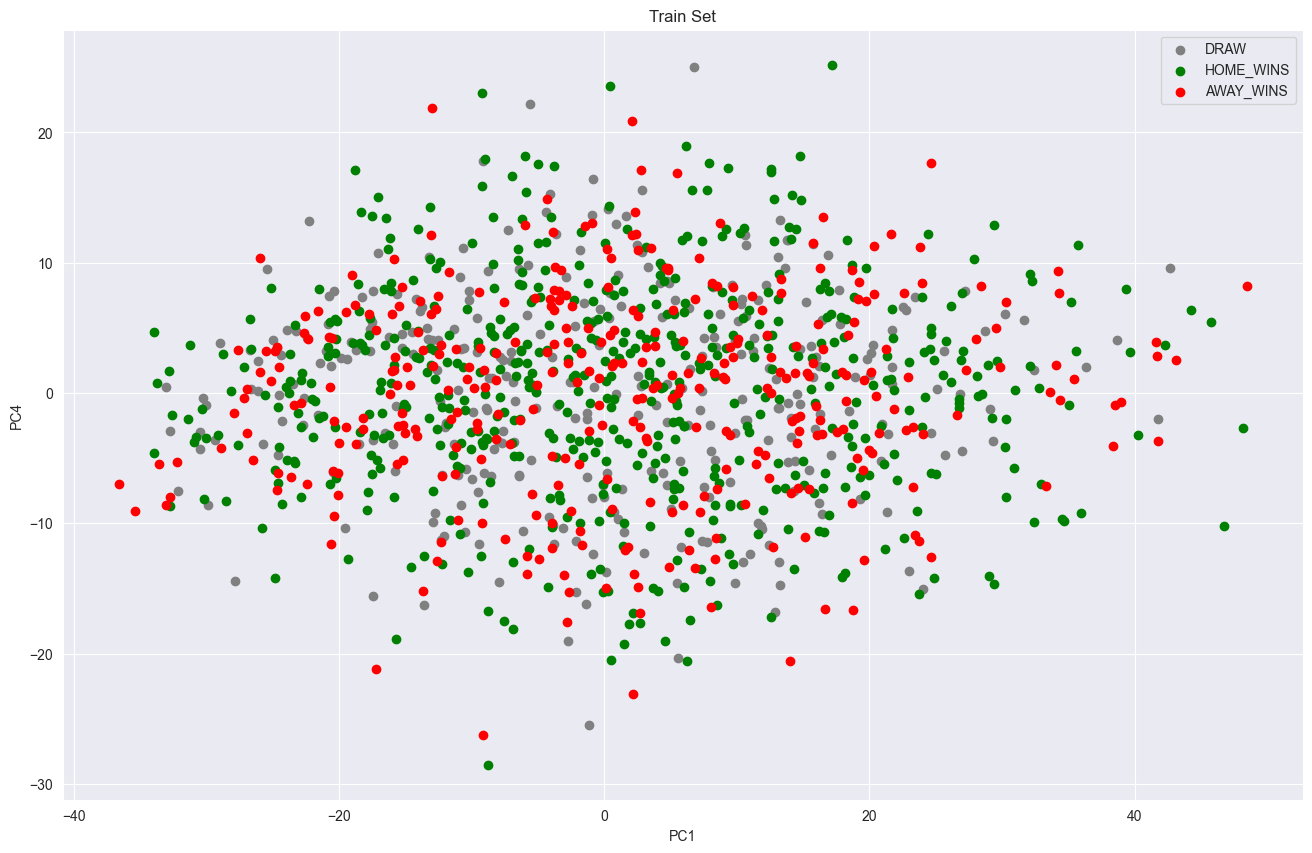

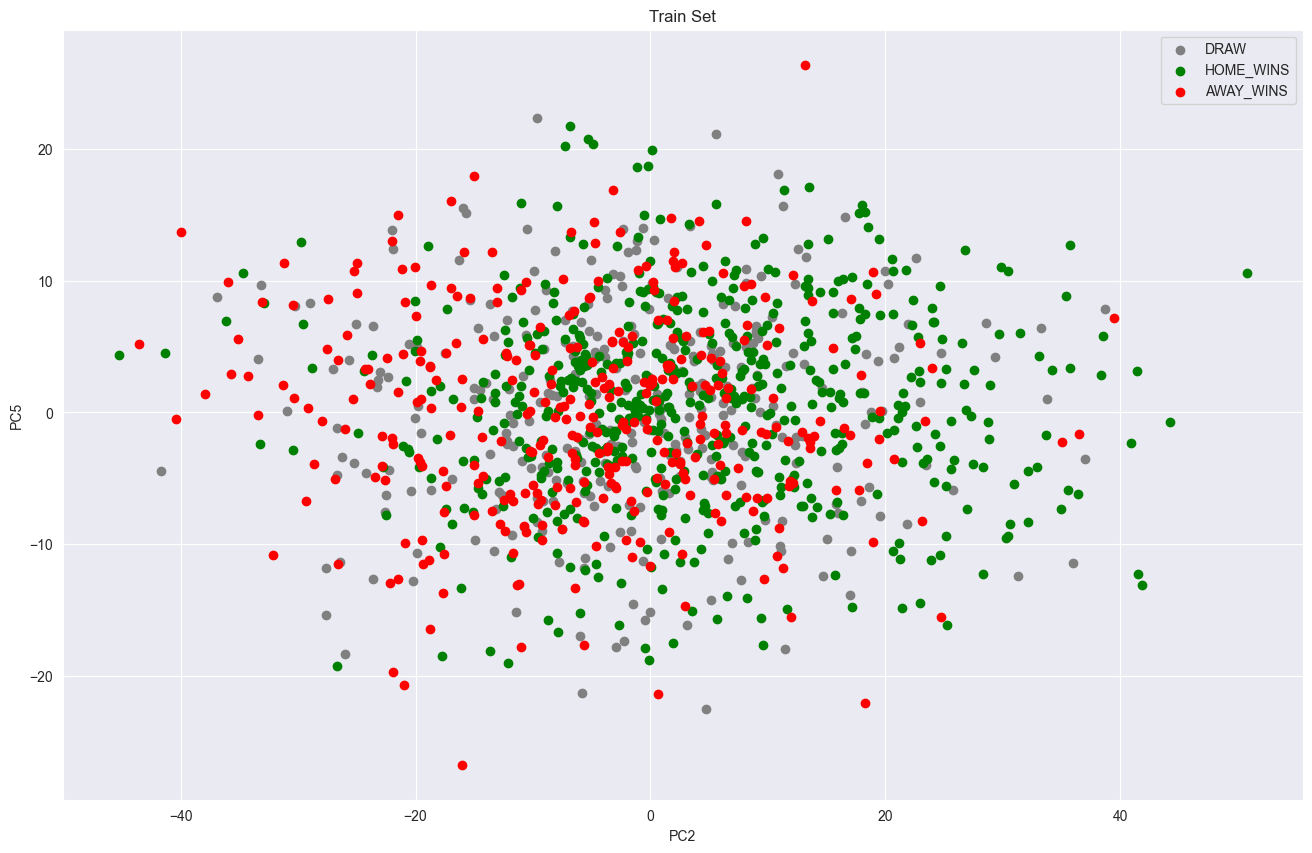

In [64]:

min_index=0
max_index=10000
for i in [0,1]:   

    column_1=attribut_test_reduced.columns[i]
    column_2=attribut_test_reduced.columns[i+3]
    plt.figure(figsize=(16, 10))
    plt.scatter(attribut_test_reduced.loc[(result_test == DRAW).values, column_1].iloc[min_index:max_index], attribut_test_reduced.loc[(result_test == DRAW).values, column_2].iloc[min_index:max_index], label="DRAW", color='gray')
    plt.scatter(attribut_test_reduced.loc[(result_test == HOME_WINS).values, column_1].iloc[min_index:max_index], attribut_test_reduced.loc[(result_test == HOME_WINS).values, column_2].iloc[min_index:max_index], label="HOME_WINS", color='green')
    plt.scatter(attribut_test_reduced.loc[(result_test == AWAY_WINS).values, column_1].iloc[min_index:max_index], attribut_test_reduced.loc[(result_test == AWAY_WINS).values, column_2].iloc[min_index:max_index], label="AWAY_WINS", color='red')

    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.title("Train Set")
    plt.legend()
    plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression
max_iter_list=[3000]
solver_list=['lbfgs', 'liblinear']
regularization_factor_list=[1,0.01]
accuracy_dict={}
LR_dict={}
for max_iter in max_iter_list:
    for solver in solver_list:
        for regularization_factor in regularization_factor_list:
            LR = LogisticRegression(max_iter=max_iter,solver=solver,C=regularization_factor).fit(attribut_train_reduced, result_train)
            yhat = LR.predict(attribut_test_reduced)
            accuracy=np.round(accuracy_score(result_test,yhat),4)
            key=f'solver_{solver}_iter_{max_iter}_C_{regularization_factor}'
            accuracy_dict[key]=accuracy
            LR_dict[key]=LR
                        


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWar

In [52]:
accuracy_dict

{'solver_lbfgs_iter_3000_C_1': 0.4809,
 'solver_lbfgs_iter_3000_C_0.01': 0.4809,
 'solver_liblinear_iter_3000_C_1': 0.4809,
 'solver_liblinear_iter_3000_C_0.01': 0.4809}

In [53]:
max_accuracy=max(accuracy_dict.items(), key=operator.itemgetter(1))
LR_best=LR_dict[max_accuracy[0]]

In [54]:
max_accuracy

('solver_lbfgs_iter_3000_C_1', 0.4809)

In [55]:
yhat = LR_best.predict(attribut_test_reduced)
np.round(accuracy_score(result_test,yhat),4)

0.4809

In [56]:
attribut_test_reduced

,PC1,PC2,PC3,PC4,PC5
11028,-7.587089,9.706078,16.903392,-17.521813,3.668211
10284,3.120619,1.906861,11.490117,-3.478229,2.566246
10177,-9.207367,-1.331856,9.451661,-3.780577,-0.015289
7139,18.409915,-8.683943,-8.243424,-3.406871,-15.791252
937,-8.148630,-19.809059,3.033028,0.998368,-3.478591
...,...,...,...,...,...
10569,21.827628,-32.864624,-3.699276,-4.648143,8.307093
10359,-6.674266,-11.376881,-3.516690,1.325337,-0.124758
745,-0.424210,-17.075515,2.350238,1.177236,-1.695055
10906,-2.895703,-3.867357,10.494537,8.936064,-3.822054


In [57]:
result_test

,result
11028,1
10284,-2
10177,1
7139,1
937,-2
...,...
10569,1
10359,1
745,-2
10906,-1


In [58]:
yhat

array([ 1,  1,  1, ..., -2,  1,  1])

In [59]:
yhat==2


array([False, False, False, ..., False, False, False])

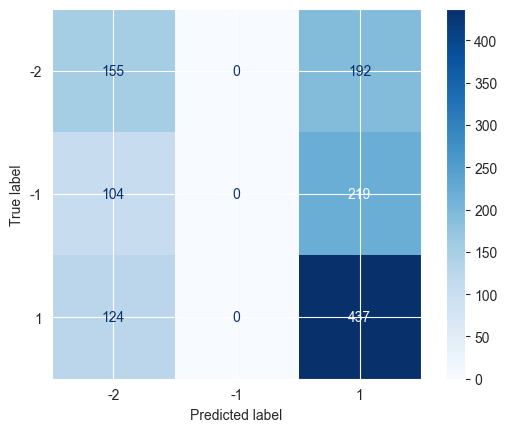

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(result_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[AWAY_WINS, DRAW, HOME_WINS],)
disp.plot(cmap="Blues")

In [61]:
test_path_away = '../data/Test_Data/test_away_team_statistics_df.csv'
test_path_home = '../data/Test_Data/test_home_team_statistics_df.csv'
df_attribut_test = prepare_attribut_data(test_path_away, test_path_home,True)

In [62]:

yhat_test = LR_best.predict(df_attribut_test)
y_pred_test = pd.DataFrame(yhat_test)
y_pred_test = convert_to_one_hot(yhat_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AWAY_TEAM_ATTACKS_5_last_match_average
- AWAY_TEAM_ATTACKS_5_last_match_std
- AWAY_TEAM_ATTACKS_5_last_match_sum
- AWAY_TEAM_ATTACKS_season_average
- AWAY_TEAM_ATTACKS_season_std
- ...
Feature names seen at fit time, yet now missing:
- PC1
- PC2
- PC3
- PC4
- PC5


In [ ]:
y_pred_testtest_prediction = pd.concat([df_attribut_test['ID'], y_pred_test], axis=1)


In [ ]:
test_prediction = y_pred_test.index.to_frame(name='ID').join(y_pred_test)

In [ ]:
test_prediction

In [ ]:
test_prediction.to_csv('./submission/pca_logistic_benchmark_submission.csv', index=False)